# Test of significance

This notebook will explain test of significance.

In [7]:
# Import libraries 
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import math

# I. two-sided test for population mean vs sample mean

First, we try two-sided test for population mean. In this test, we want to know whether sample mean can be equal to population mean. In other words, our null hypothesis H is H:population mean = sample mean, otherwise, the alternative hypothesis H' is H':population mean != sample mean.

Terminology 
    test statistic ... the value used for a threshold
    
## I - i) If we know population standard deviation (Z-test),
### Population distribution

First plot a distribution of Population data (Let's say people's height). Here assume that the population data has a normal distribution with population mean=170 and population standard deviation=10.

*Generally, population mean and population standard deviation will not be computed in experimental data. To compute these value, you need to collect all data in the population.

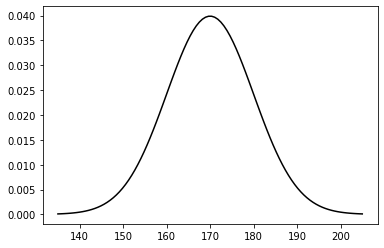

Population mean = 170
Population Standard Deviation = 10


In [66]:
# Set population properties
Pmean = 170# Mean of population data (this will not be computed in experimental data because you cannot have all individual data for this)
PSD = 10 # Population standard deviation (this will not be computed in experimental data as well)

# Plot histogram for population data 
x = np.linspace(Pmean - 3.5*PSD, Pmean + 3.5*PSD, 100) 
plt.plot(x, stats.norm.pdf(x, Pmean, PSD), color='k')

plt.show()
print('Population mean = ' + str(Pmean))
print('Population Standard Deviation = ' + str(PSD))

### Sampling distribution 

In our experiment, we randomly pick up 25 people (sample size = 25) and measure their height. Based on the results, we plot histogram and get sample mean.

25
Observed data : 
[185.28808744 164.21998501 167.46277668 173.89776627 158.04554562
 181.26431432 157.69021046 178.82261368 168.39239728 169.13551103
 171.99643407 179.81994932 169.38717896 174.05638008 169.99852174
 160.93254607 172.39914886 150.2618446  162.47671899 170.46705062
 174.82924517 161.13036505 161.15978004 149.57748775 161.86105185]


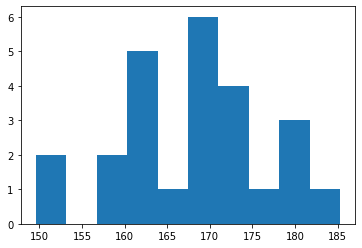

Sample mean = 167.78291643808222


In [67]:
# Sample size
Sn=25
# Data you get 
Sdata = np.random.normal(Pmean, PSD, Sn)

print(Sn)
print('Observed data : ')
print(Sdata)

# Plot histogram
fig, ax = plt.subplots()
ax.hist(Sdata)
plt.show() 

# Compute Sample mean
Smean = np.mean(Sdata)

print('Sample mean = ' + str(Smean))

### Compute Z-score

We got sample mean = {{Smean}}. So, we will check whether {{Pmean}} = {{Smean}} by Z-score.

In [68]:
# Compute Z-score
Z = (Smean - Pmean) / (PSD * np.sqrt(Sn))

print('Z-score = ' + str(Z))

Z-score = -0.0443416712383555


Z-score have a distribution of N(0,1). So, we plot N(0,1) and whether Z-score will be in the distribution.

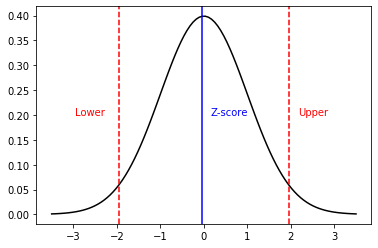

In [69]:
# Plot Distribution
x = np.linspace(0 - 3.5*1, 0 + 3.5*1, 100) 
plt.plot(x, stats.norm.pdf(x, 0, 1), color='k')

# Plot Z-score 
plt.axvline(Z, color = 'b')
plt.text(Z + 0.2, 0.2, 'Z-score', color = 'b')

# Plot 0.05% point
percent_a = 0.05
upper_bond = 1 - percent_a/2
lower_bond = percent_a/2
plt.axvline(stats.norm.ppf(upper_bond, 0, 1), color = 'r', linestyle = '--')
plt.axvline(stats.norm.ppf(lower_bond, 0, 1), color = 'r', linestyle = '--')
plt.text(stats.norm.ppf(upper_bond, 0, 1) + 0.2, 0.2, 'Upper', color='r')
plt.text(stats.norm.ppf(lower_bond, 0, 1) - 1, 0.2, 'Lower', color='r')

plt.show()

According to the above figure, the null hypothesis is accepted because Z-score is located between lower and upper bond.

If the Z-score is outside of the range, then the null hypothesis is rejected, that is, the alternative hypothesis is accepted. 

## I - ii) If we do not know population standard deviation (t-test), 

In the case of i), we assume that we know population standard deviation. However, in most experiments, we cannot get population standard deviation. So, instead of population statndard deviation, we use unbiased standard deviation.

### Population distribution

First plot a distribution of Population data (Let's say people's height). Here assume that the population data has a normal distribution with population mean=170 and population standard deviation=10.

*Generally, population mean and population standard deviation will not be computed in experimental data. To compute these value, you need to collect all data in the population.

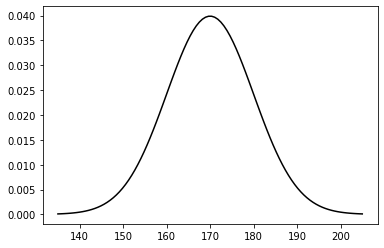

Population mean = 170
Population Standard Deviation = 10


In [70]:
# Set population properties
Pmean = 170# Mean of population data (this will not be computed in experimental data because you cannot have all individual data for this)
PSD = 10 # Population standard deviation (this will not be computed in experimental data as well)

# Plot histogram for population data 
x = np.linspace(Pmean - 3.5*PSD, Pmean + 3.5*PSD, 100) 
plt.plot(x, stats.norm.pdf(x, Pmean, PSD), color='k')

plt.show()
print('Population mean = ' + str(Pmean))
print('Population Standard Deviation = ' + str(PSD))

### Sampling distribution 

In our experiment, we randomly pick up 25 people (sample size = 25) and measure their height. Based on the results, we plot histogram and get sample mean.

25
Observed data : 
[180.9799223  178.86909517 170.72436145 182.65226821 183.58665781
 170.09605124 180.44620631 169.68479718 164.72061814 168.3871334
 152.76104264 178.72670413 187.23106514 159.57908065 168.2406694
 175.39911454 164.15451083 156.20424157 160.66952079 174.68114171
 178.67860836 180.25540647 157.00696757 177.39530392 170.09659262]


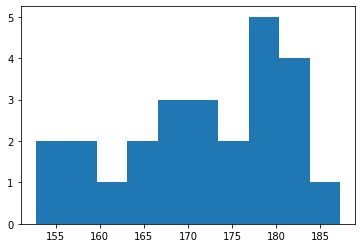

Sample mean = 171.64908326265896


In [71]:
# Sample size
Sn=25
# Data you get 
Sdata = np.random.normal(Pmean, PSD, Sn)

print(Sn)
print('Observed data : ')
print(Sdata)

# Plot histogram
fig, ax = plt.subplots()
ax.hist(Sdata)
plt.show() 

# Compute Sample mean
Smean = np.mean(Sdata)

print('Sample mean = ' + str(Smean))

### Compute t-score

We got sample mean = {{Smean}}. So, we will check whether {{Pmean}} = {{Smean}} by t-score. 
Here, we do not know sample standard deviation.

In [72]:
# compute unbiased standard deviation
Sdata_for_var = np.square(Sdata - Smean)
Uvar = np.sum(Sdata_for_var)/(Sn-1)
USD = np.sqrt(Uvar)

# standard error
SE = USD * np.sqrt(Sn) 
# Compute t-score
t = (Smean - Pmean) / SE

print('t-score = ' + str(t))

t-score = 0.03472795458484463


In [ ]:
t-score does not have a distribution of N(0,1) as Z-score does. Instead, t-score have a t distribution that is computed of a distribution N(0,1) and a kai(n-1) distribution. This t distribution has a degree of freedom of (n-1). 
t distribution is equivalent to a distribution of N(0,1) when a defree of freedom is large enough.

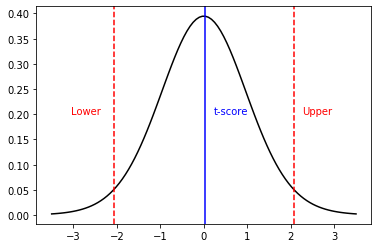

In [73]:
# A degree of freedom
DF = Sn - 1 
# Plot t distribution
x = np.linspace(0 - 3.5*1, 0 + 3.5*1, 100) 
plt.plot(x, stats.t.pdf(x, DF), color='k')

# Plot t-score 
plt.axvline(t, color = 'b')
plt.text(t + 0.2, 0.2, 't-score', color = 'b')

# Plot 0.05% point
percent_a = 0.05
upper_bond = 1 - percent_a/2
lower_bond = percent_a/2
plt.axvline(stats.t.ppf(upper_bond, DF), color = 'r', linestyle = '--')
plt.axvline(stats.t.ppf(lower_bond, DF), color = 'r', linestyle = '--')
plt.text(stats.t.ppf(upper_bond, DF) + 0.2, 0.2, 'Upper', color='r')
plt.text(stats.t.ppf(lower_bond, DF) - 1, 0.2, 'Lower', color='r')

plt.show()

According to the above figure, the null hypothesis is accepted because t-score is located between lower and upper bond.

If the t-score is outside of the range, then the null hypothesis is rejected, that is, the alternative hypothesis is accepted. 

# II. population mean from one group vs population mean from another group

In this section, we try to test whether or not population mean from a group "A" can be considered to be same as one from another group "B". 
In other words, our null hypothesis H is H:population mean from A = population mean from B, otherwise, the alternative hypothesis H' is H':population mean from A != population mean from B.

    
## II-i) If we know  population standard deviation of both group  A and B
### Population distribution from group A and group B

First plot two distributions of Population A and B (Let's say height of men and of women). Here assume that the population A (men) has a normal distribution with population mean=175 and population standard deviation=15 for men. The other population B (women) has a normal distribution with population mean=160 and population standard deviation=5.

*Generally, population mean and population standard deviation will not be computed in experimental data. To compute these value, you need to collect all data in the population.

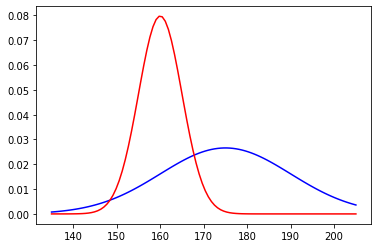

Population mean from Group (A,B) = (175, 160)
Population Standard Deviation from Group (A, B) = (15, 5)


In [111]:
# Set population properties
# Group A
PmeanA = 175 # Mean of population data (this will not be computed in experimental data because you cannot have all individual data for this)
PSDA = 15 # Population standard deviation (this will not be computed in experimental data as well)

# Group B
PmeanB = 160
PSDB = 5


# Plot histogram for population data 
x = np.linspace(Pmean - 3.5*PSD, Pmean + 3.5*PSD, 100) 
plt.plot(x, stats.norm.pdf(x, PmeanA, PSDA), color='b')

plt.plot(x, stats.norm.pdf(x, PmeanB, PSDB), color='r')

plt.show()
print('Population mean from Group (A,B) = ' + '('+ str(PmeanA)  +', '+ str(PmeanB) + ')')
print('Population Standard Deviation from Group (A, B) = ' + '('+ str(PSDA)  +', '+ str(PSDB) + ')')

### Sampling distribution 

In our experiment, we randomly pick up 25 men (sample size A = 25) and 15 women (sample size B = 15) and measure their height. Based on the results, we plot histogram and get sample mean.

Sample size from group(A,B) =(25,15)
Observed data from group A: 
[181.29690195 168.17289771 179.96419002 190.81256791 202.7760425
 164.00480559 157.56586583 185.06865554 160.37398403 168.05577505
 164.71236902 176.47412655 178.33658081 166.32931991 191.49281413
 197.83426113 167.63113929 158.37874984 153.91070864 182.91409545
 180.75728136 160.04081383 190.57117683 159.77976961 157.23351117]
Observed data from group B: 
[160.02118563 157.33181363 159.90513304 163.96279294 160.67907266
 154.749645   151.57263025 163.31620253 157.53441379 164.27406594
 160.50134375 151.05088812 156.32953669 162.69890251 157.52525836]


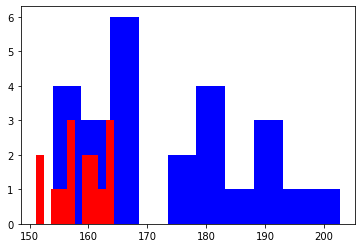

Sample mean from group (A,B) = (173.7795361472619,158.76352565522785)


In [112]:
# Sample size
SnA = 25
SnB = 15
# Data you get 
SdataA = np.random.normal(PmeanA, PSDA, SnA)
SdataB = np.random.normal(PmeanB, PSDB, SnB) 

print('Sample size from group(A,B) =' + '('+  str(SnA) + ',' + str(SnB) + ')')
print('Observed data from group A: ')
print(SdataA)
print('Observed data from group B: ')
print(SdataB)

# Plot histogram
fig, ax = plt.subplots()
ax.hist(SdataA, color = 'b')
ax.hist(SdataB, color = 'r')
plt.show() 

# Compute Sample mean
SmeanA = np.mean(SdataA)
SmeanB = np.mean(SdataB)

print('Sample mean from group (A,B) = ' + '('+  str(SmeanA) + ',' + str(SmeanB) + ')')
      

### Z-score
Sample mean from group A has a distribution of N(PmeanA, PvarA/SnA). 
Sample mean from group B has a distribution of N(PmeanB, PvarB/SnB).

Assume that sample mean from group A and sample mean from group B are independent. (e.g. do not pick up samples from families and relatives). Then, 
The difference SmeanA - SmeanB has a distribution N(PmeanA - PmeanB, (PvarA/SnA + PvarB/SnB))

In [118]:
# Z-score
Z_AB = ((SmeanA - SmeanB) - (PmeanA - PmeanB)) / np.sqrt(PSDA**2/SnA + PSDB**2/SnB)

print('Z-score = ' + str(Z_AB))

Z-score = 0.004902192001787082


Z-score have a distribution of N(0,1). So, we plot N(0,1) and whether Z-score will be in the distribution.

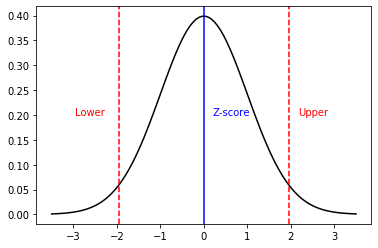

In [119]:
# Plot Distribution
x = np.linspace(0 - 3.5*1, 0 + 3.5*1, 100) 
plt.plot(x, stats.norm.pdf(x, 0, 1), color='k')

# Plot Z-score 
plt.axvline(Z_AB, color = 'b')
plt.text(Z_AB + 0.2, 0.2, 'Z-score', color = 'b')

# Plot 0.05% point
percent_a = 0.05
upper_bond = 1 - percent_a/2
lower_bond = percent_a/2
plt.axvline(stats.norm.ppf(upper_bond, 0, 1), color = 'r', linestyle = '--')
plt.axvline(stats.norm.ppf(lower_bond, 0, 1), color = 'r', linestyle = '--')
plt.text(stats.norm.ppf(upper_bond, 0, 1) + 0.2, 0.2, 'Upper', color='r')
plt.text(stats.norm.ppf(lower_bond, 0, 1) - 1, 0.2, 'Lower', color='r')

plt.show()